In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
boston = pd.read_csv('./data/Boston_house.csv')

In [3]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


1978 보스턴 주택 가격

506개 타운의 주택 가격 중앙값(단위: $1,000)
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수 
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방 피트를 초과한 거주지역 비율
- CHAS: 찰스강 경계에 위치한 경우 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

## 다중선형회귀분석

### crim, rm, lstat 세 개의 변수를 통해 다중회귀적합

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

In [6]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [7]:
x_data1 = sm.add_constant(x_data, has_constant="add")

In [8]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [9]:
print(fitted_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.01e-112
Time:                        20:57:18   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.4

### crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석

In [11]:
x_data2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [12]:
x_data2_ = sm.add_constant(x_data2, has_constant='add')

In [13]:
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

In [14]:
print(fitted_multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          5.76e-111
Time:                        21:01:02   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.0

In [16]:
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [17]:
fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

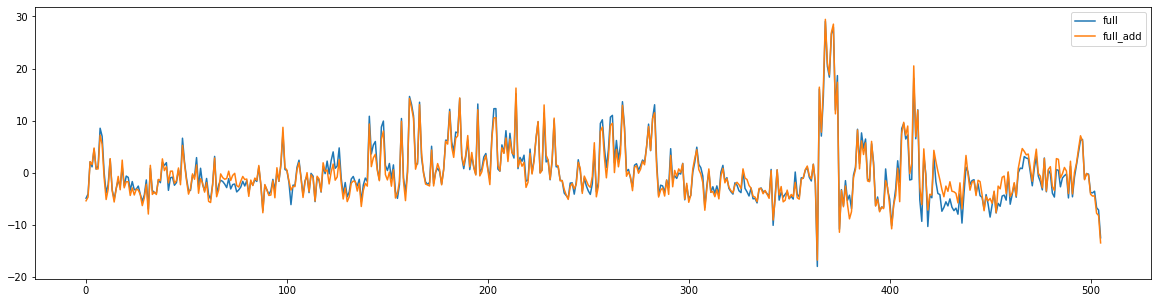

In [67]:
#base모델과 full모델의 잔차비교
import matplotlib.pyplot as plt

plt.figure( figsize=(20,5) )
fitted_multi_model.resid.plot(label="full")
fitted_multi_model2.resid.plot(label="full_add")
plt.legend()
plt.show()

### 상관계수/산점도를 통해 다중공선성 확인

In [19]:
# 상관행렬
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


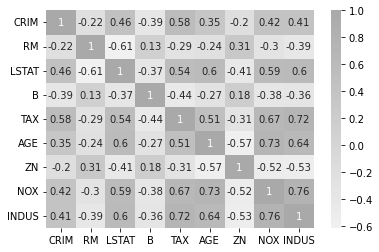

In [21]:
import seaborn as sns
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

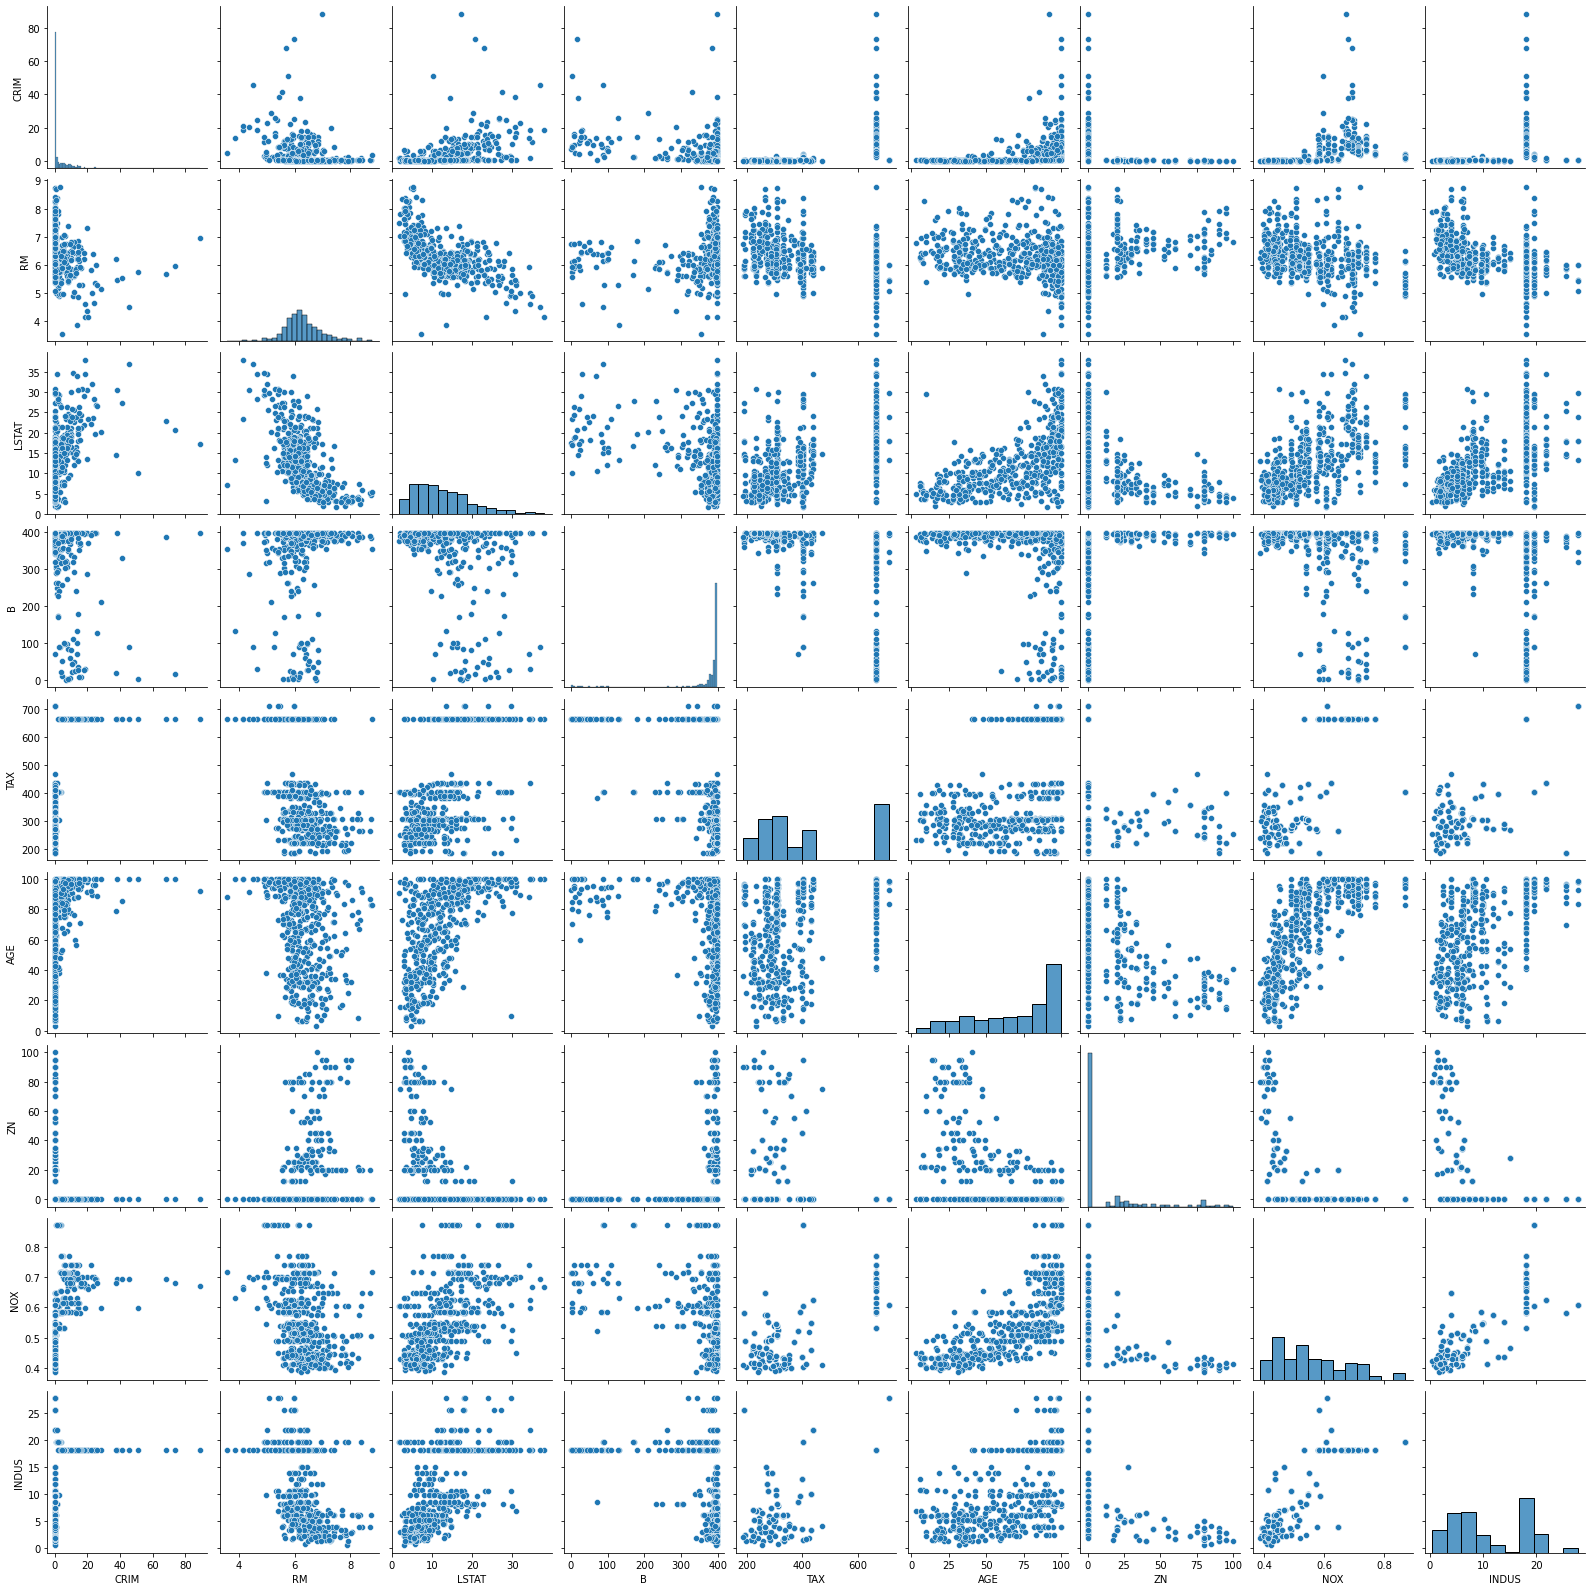

In [22]:
sns.pairplot(x_data2)
plt.show()

### VIF를 통한 다중공선성 확인

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns

In [24]:
vif #값이 10 이상일 경우 다중공선성이 있다고 판단

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [28]:
# NOX 변수 제거후(x_data3) VIF 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop('NOX', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [29]:
# RM 변수 제거후(x_data4) VIF 확인

vif = pd.DataFrame()
x_data4 = x_data3.drop('RM', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [30]:
x_data3_ = sm.add_constant(x_data3, has_constant='add') # NOX제거
x_data4_ = sm.add_constant(x_data4, has_constant='add') # NOX, RM 제거

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()

model_vif2 = sm.OLS(target, x_data4_)
fitted_model_vif2 = model_vif2.fit()

In [31]:
print(fitted_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          7.62e-112
Time:                        21:23:38   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.1

In [32]:
print(fitted_model_vif2.summary()) #R-sqaured 값이 크게 감소 -> 변수 제거x

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           5.53e-89
Time:                        21:24:05   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.0

## 학습/검증 데이터 분할

In [40]:
from sklearn.model_selection import train_test_split
X = x_data2_ #전체 데이터에 상수항을 추가한 데이터
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [42]:
fit_1 = sm.OLS(train_y, train_x)
fit_1 = fit_1.fit()

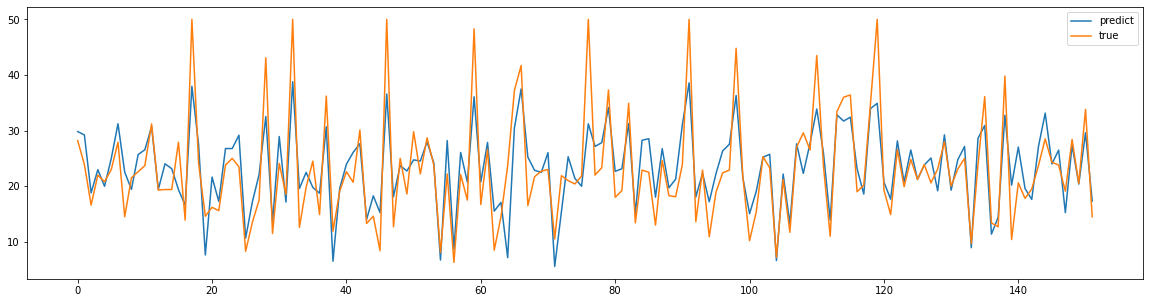

In [55]:
# 검증데이터에 대한 예측값과 true값 비교
plt.figure( figsize=(20,5) )
plt.plot(np.array(fit_1.predict(test_x)), label='predict')
plt.plot(np.array(test_y), label="true")
plt.legend()
plt.show()

In [44]:
X = x_data3_ #NOX 제거 데이터에 상수항을 추가한 데이터
y = target
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [45]:
X = x_data4_ #NOX, RM 제거 데이터에 상수항을 추가한 데이터
y = target
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [46]:
test_y

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


In [47]:
test_y2

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


In [48]:
test_y3

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


In [51]:
# NOX제거 회귀모델적합
fit_2 = sm.OLS(train_y2, train_x2)
fit_2 = fit_2.fit()

# NOX, RM제거 회귀모델적합
fit_3 = sm.OLS(train_y3, train_x3)
fit_3 = fit_3.fit()

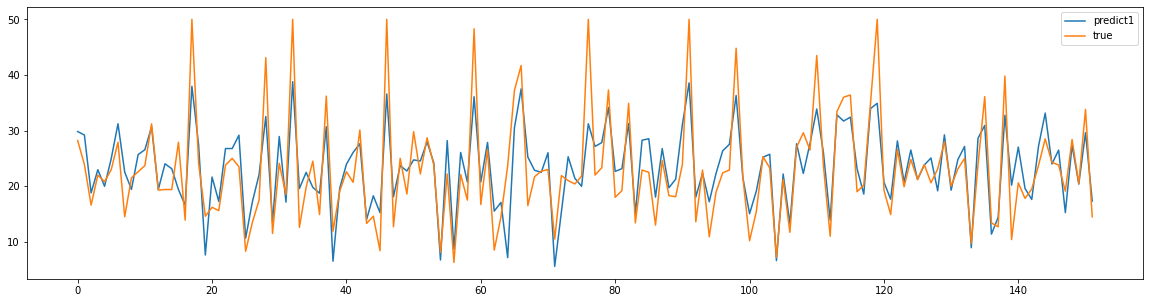

In [57]:
#full 모델
plt.figure( figsize=(20,5) )
plt.plot(np.array(fit_1.predict(test_x)), label="predict1")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

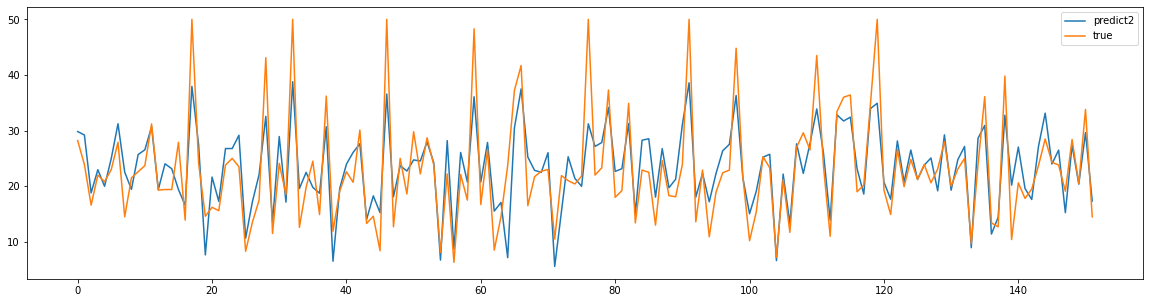

In [58]:
# NOX 제거
plt.figure( figsize=(20,5) )
plt.plot(np.array(fit_2.predict(test_x2)), label="predict2")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

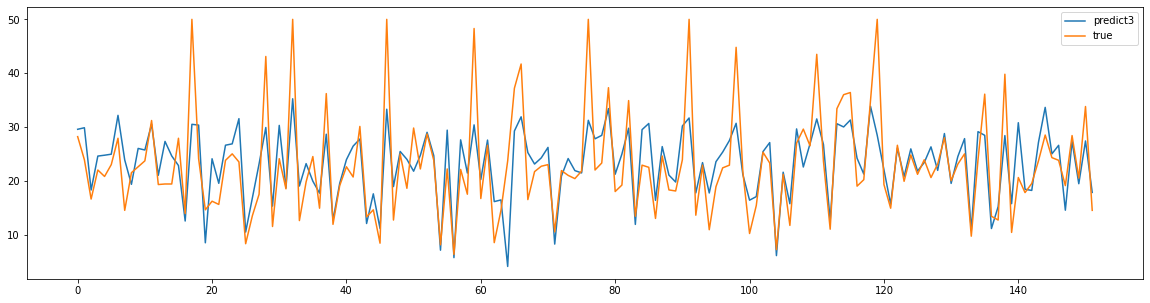

In [59]:
# NOX, RM 제거
plt.figure( figsize=(20,5) )
plt.plot(np.array(fit_3.predict(test_x3)), label="predict3")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

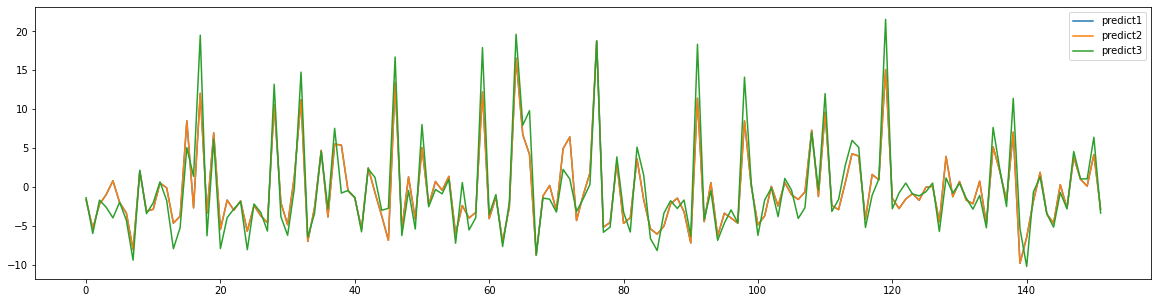

In [61]:
# 잔차 비교
plt.figure( figsize=(20,5) )
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)), label="predict1")
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)), label="predict2")
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)), label="predict3")
plt.legend()
plt.show()

## MSE를 통한 검증데이터에 대한 성능비교

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_true = test_y['Target'], y_pred = fit_1.predict(test_x))

26.14863146881989

In [65]:
mean_squared_error(y_true = test_y['Target'], y_pred = fit_2.predict(test_x2))

26.140062609846407

In [66]:
mean_squared_error(y_true = test_y['Target'], y_pred = fit_3.predict(test_x3))

38.78845317912832